In [1]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Predefined functions; they should look familiar to functions you've coded in assignments!
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    """Return an array of all the residuals"""
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

## Regression Model

In [3]:
# Ignore this code; it produces plots for demonstrating the regression model
# we say ignore, only because it is using some plot techniques that aren't explicitly taught in the course series
def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

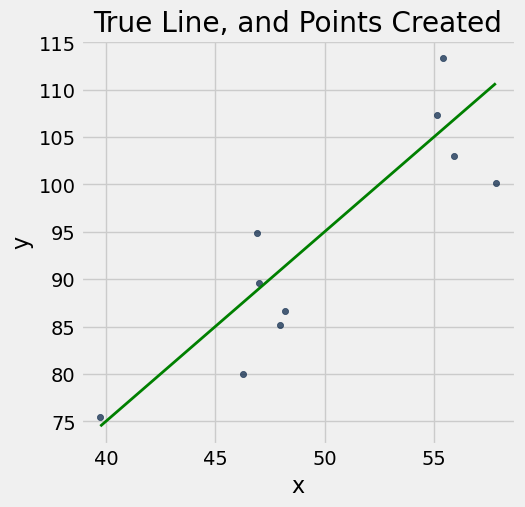

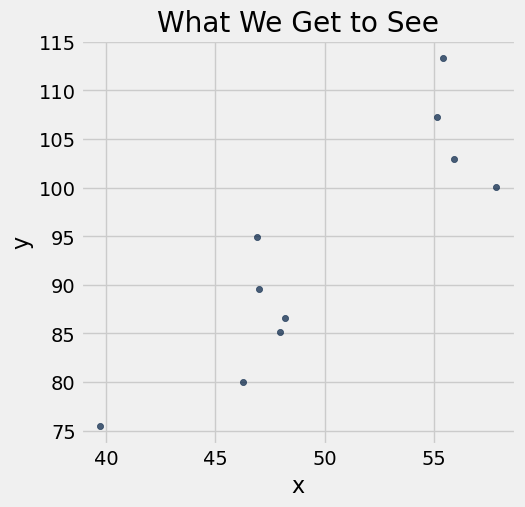

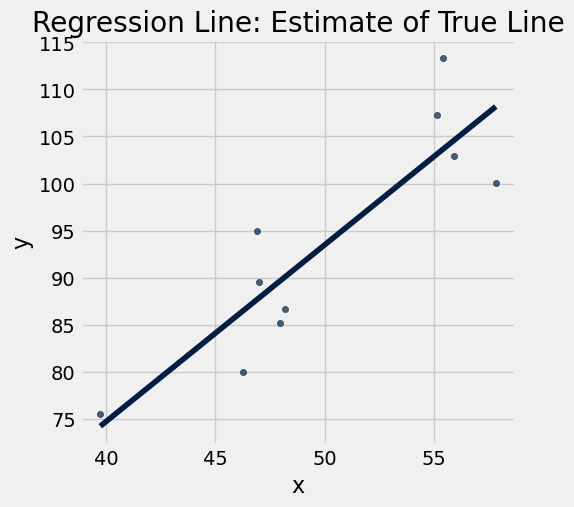

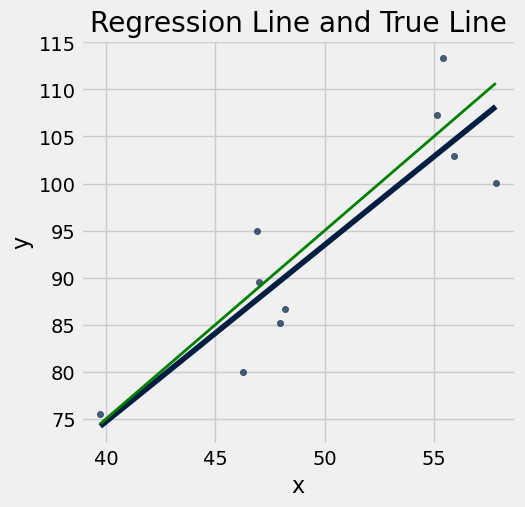

In [4]:
draw_and_compare(2, -5, 10)

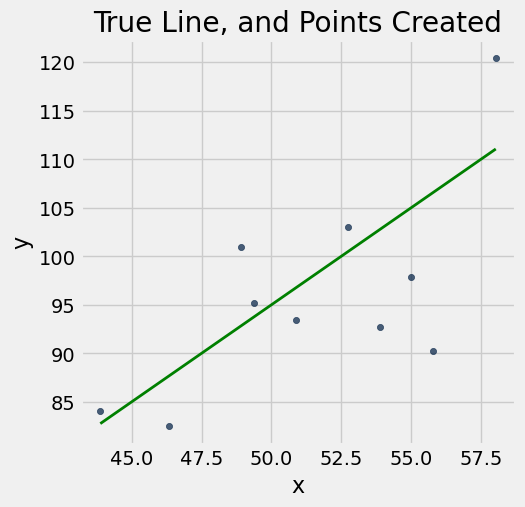

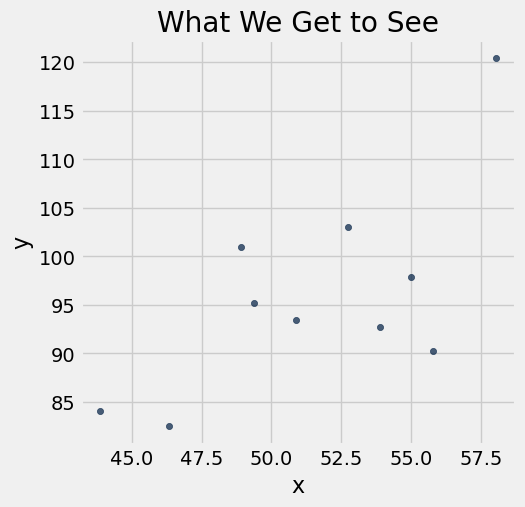

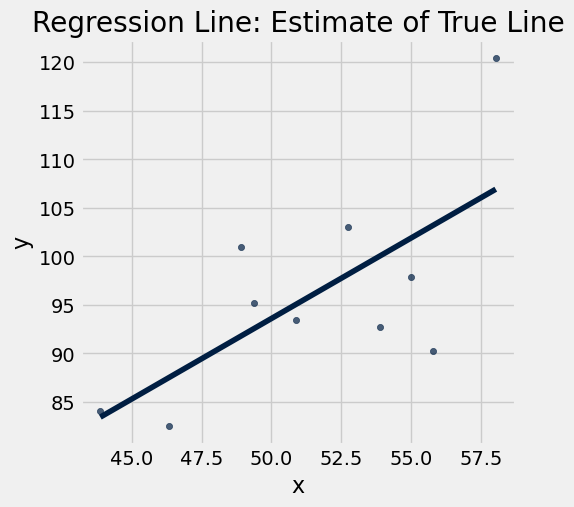

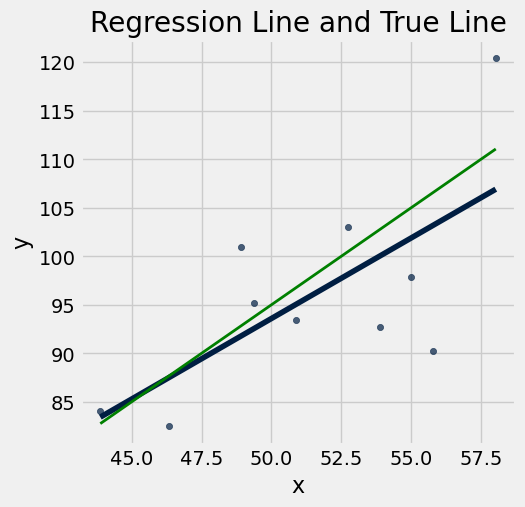

In [5]:
draw_and_compare(2, -5, 10)

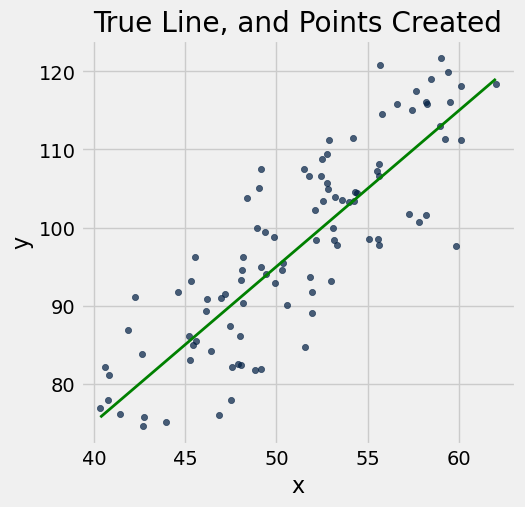

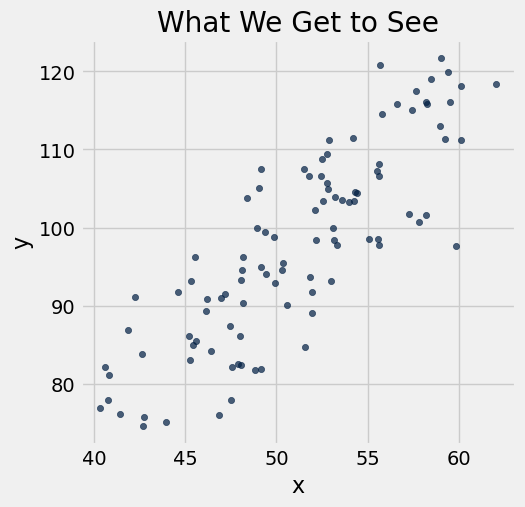

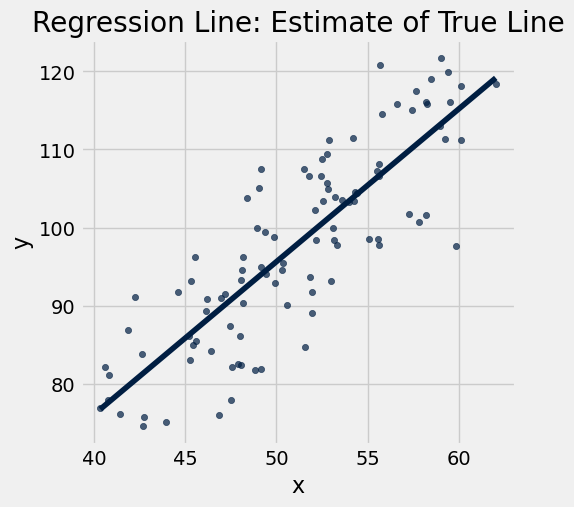

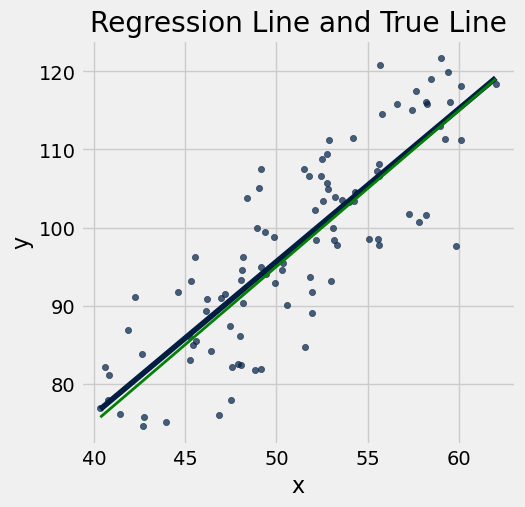

In [6]:
draw_and_compare(2, -5, 100)

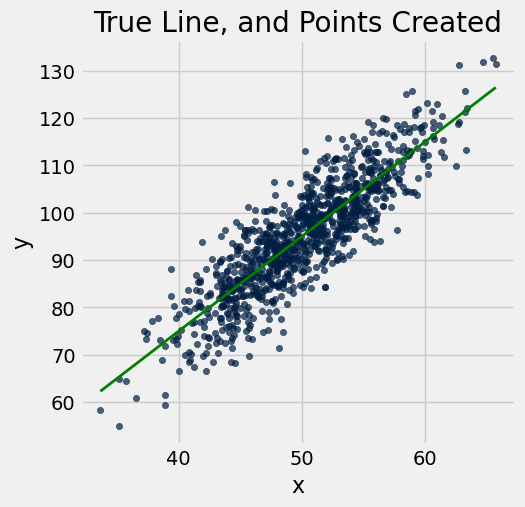

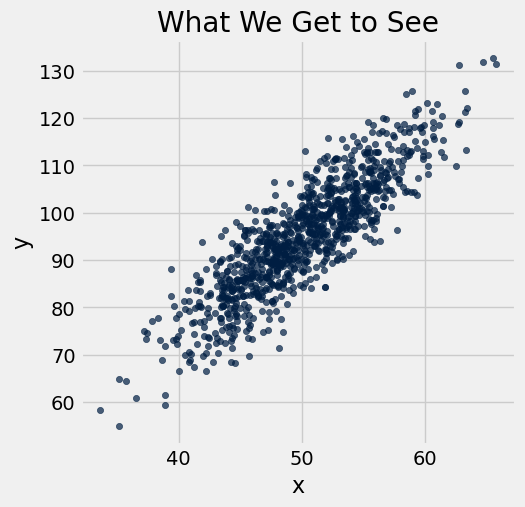

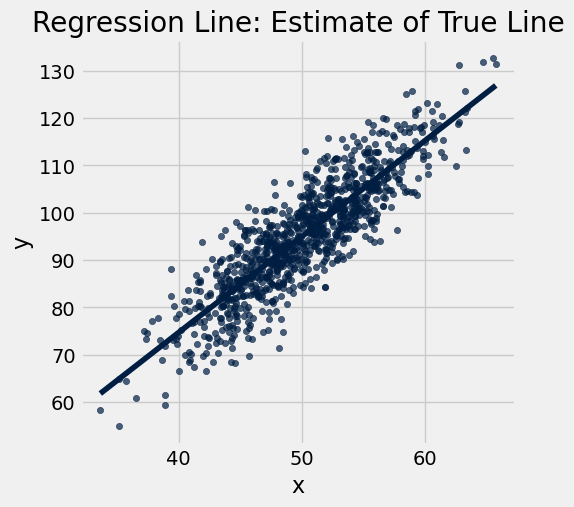

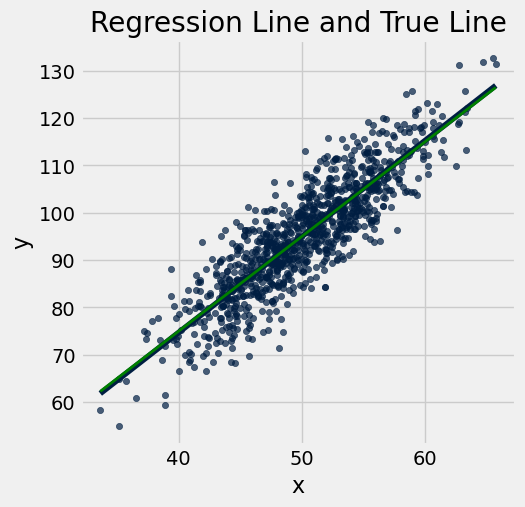

In [7]:
draw_and_compare(2, -5, 1_000)

---

<center> Return to Slides </ceter>

---

## Prediction

In [8]:
births = Table.read_table('data/baby.csv')
births.num_rows

1174

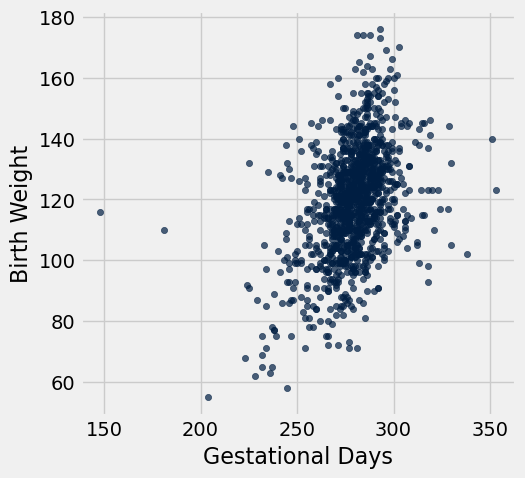

In [9]:
births.scatter('Gestational Days', 'Birth Weight')

In [10]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

(259, 294)

In [11]:
births = births.where('Gestational Days', are.between(225, 325))

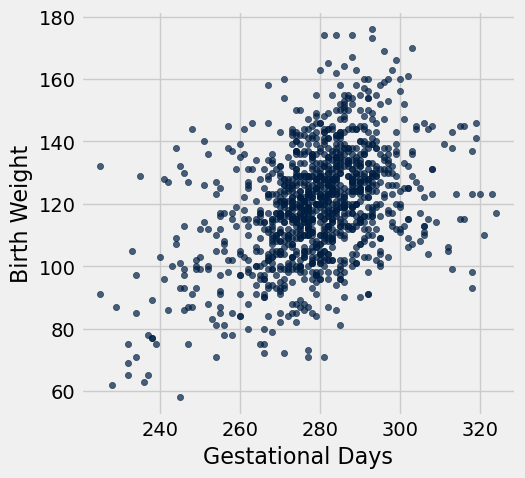

In [12]:
births.scatter('Gestational Days', 'Birth Weight')

## Suppose we assume the regression model

In [13]:
births_corr = correlation(births, 'Gestational Days', 'Birth Weight')

In [14]:
births_slope = slope(births, 'Gestational Days', 'Birth Weight')

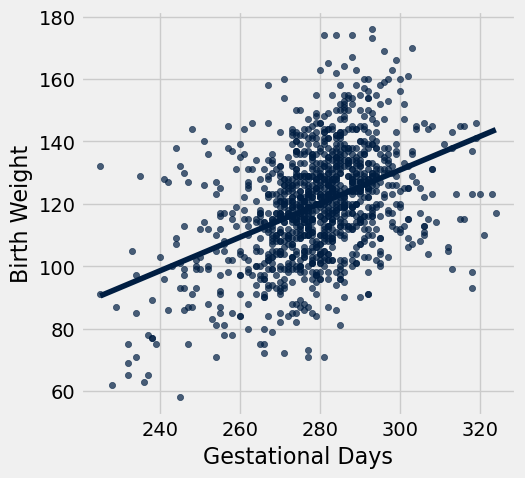

In [15]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

**Question**
- Does the correlation equal the slope of the regression line?

In [16]:
births_corr, births_slope
# we see they are not equal, with our slope slightly larger than our correlation

# does our graph need to be in standard units for the slope and correlation to be equal?
# we know correlation requires standard units
# and our graphs below are in original units...

# question for you... can you plot in standard units?
# and then plot the fitted line and overlay it with the fitted values line?
# and then compare the corr and slope then, what happens?



(0.42295118452423991, 0.53784536766790358)

## Prediction at a Given Value of x

In [17]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    # we return the predicted y value, at a given x-value
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [18]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.80951674248769

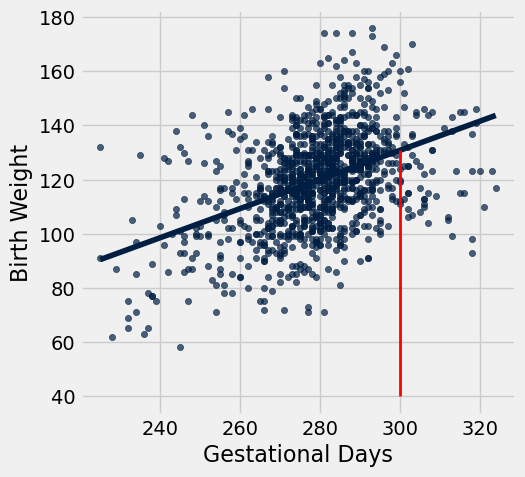

In [19]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

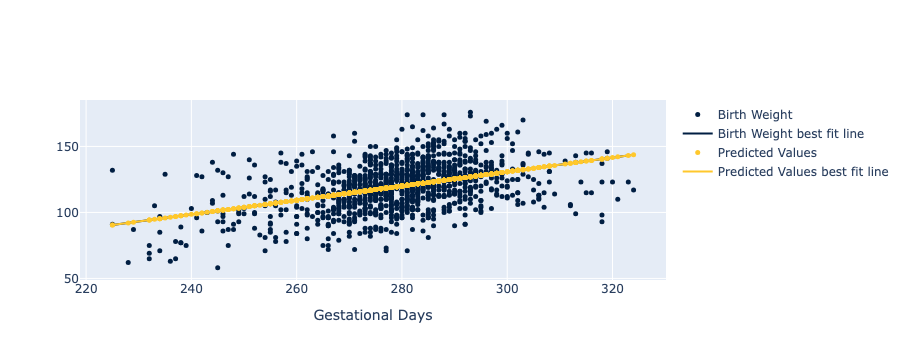

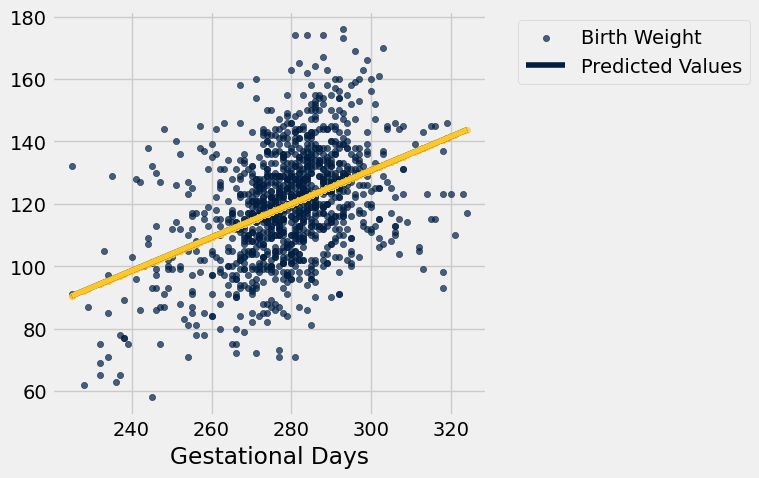

In [20]:
pred_values = fitted_values(births, 'Gestational Days', 'Birth Weight')
births = births.with_column('Predicted Values', pred_values)
births.scatter('Gestational Days', ['Birth Weight','Predicted Values' ], fit_line=True)
# or we can do the following
births.select('Gestational Days', 'Birth Weight', 'Predicted Values').iscatter('Gestational Days', fit_line=True)

In [21]:
280/7
9*4.3 < 40 * 7
# 40 weeks is the average gestational days
# babys on average are in mom a little more than 9 months

True

In [22]:
42*7

294

In [23]:
Table.scatter?

Signature:
Table.scatter(
    self,
    column_for_x,
    select=None,
    overlay=True,
    fit_line=False,
    group=None,
    labels=None,
    sizes=None,
    width=None,
    height=None,
    s=20,
    **vargs,
)
Docstring:
Creates scatterplots, optionally adding a line of best fit. Redirects to ``Table#iscatter``
if interactive plots are enabled with ``Table#interactive_plots``

args:
    ``column_for_x`` (``str``): the column to use for the x-axis values
        and label of the scatter plots.

kwargs:
    ``overlay`` (``bool``): if true, creates a chart with one color
        per data column; if false, each plot will be displayed separately.

    ``fit_line`` (``bool``): draw a line of best fit for each set of points.

    ``vargs``: additional arguments that get passed into `plt.scatter`.
        see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
        for additional arguments that can be passed into vargs. these
        include: `marker` and `norm`, to na

---

<center> Return to Slides </ceter>

---

## Bootstrapping the Sample

In [24]:
plots.figure?
plots.scatter?

Signature:
plots.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    

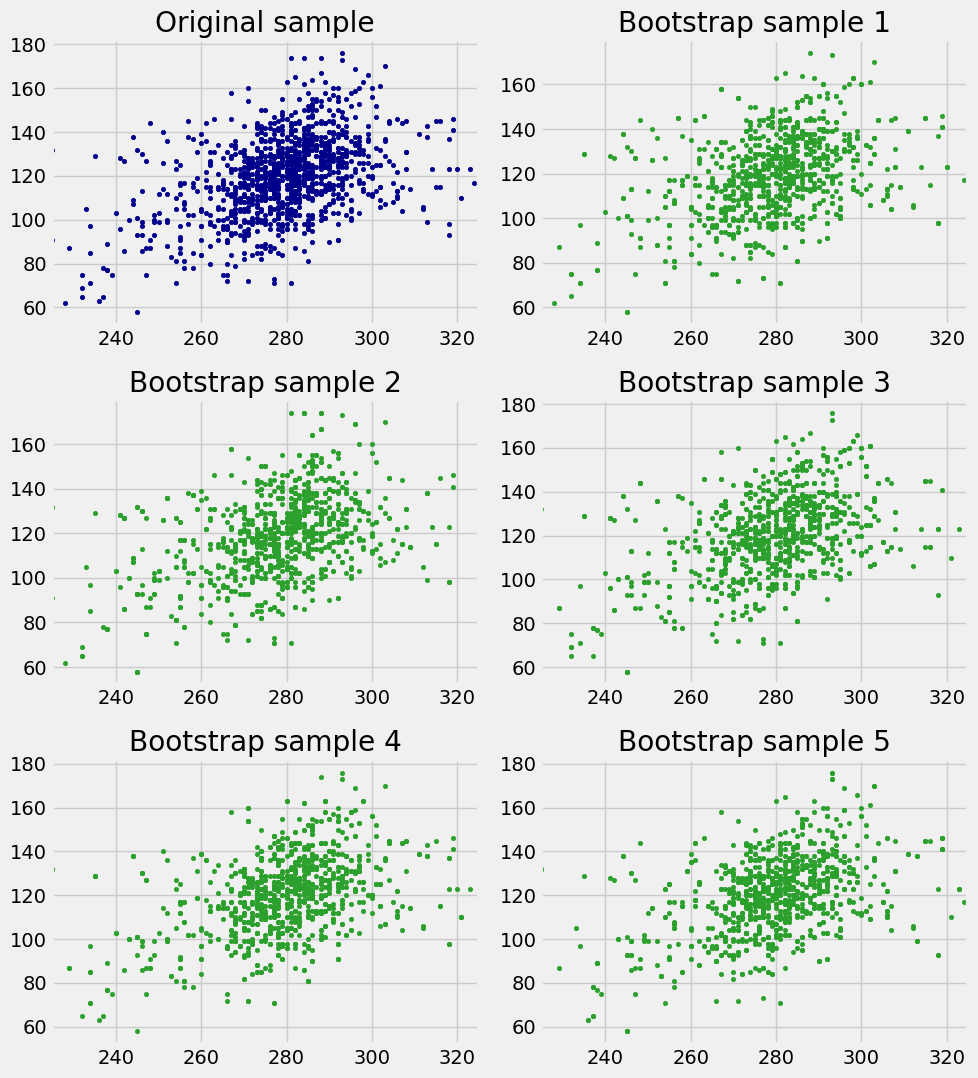

In [25]:
# You don't need to understand the plotting code in this cell,
# but you should understand the figure that comes out.
# note, some of these plotting techniques are slightly out of scope of this class

plots.figure(figsize=(10, 11))
plots.subplot(3, 2, 1)
plots.scatter(births[1], births[0], s=10, color='darkblue') 
# using column position to define our x and y-axis
#gestational days is our x-axis
# birth weight is our y-axis
plots.xlim([225, 325])
plots.title('Original sample')

for i in np.arange(1, 6, 1): #(1,2,3,4,5)
    plots.subplot(3,2,i+1)
    resampled = births.sample()
    # resampled generates a bootstrap sample
    # remember .sample() gives us us a sample of the same size as the original table
    # and samples WITH replacement
    # unique sample compared to original, some duplicate entries
    plots.scatter(resampled.column('Gestational Days'), resampled.column('Birth Weight'), s=10, color='tab:green')
    plots.xlim([225, 325])
    plots.title('Bootstrap sample '+str(i))
plots.tight_layout()

Predicted y from bootstrap sample was 130.682969004
Predicted y from bootstrap sample was 131.442352323
Predicted y from bootstrap sample was 130.426414117
Predicted y from bootstrap sample was 131.392316736
Original sample prediction of baby birth weight (oz) at 300 gestational days: 130.809516742


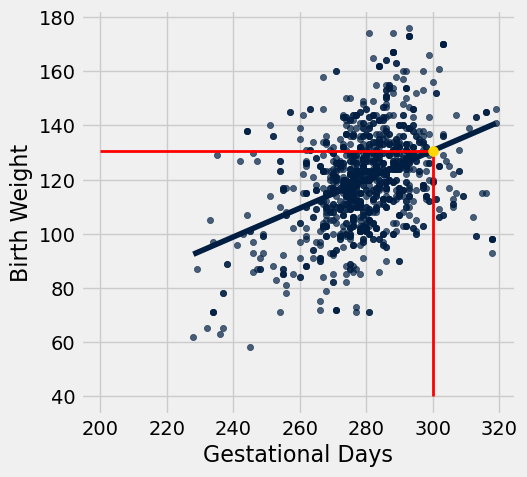

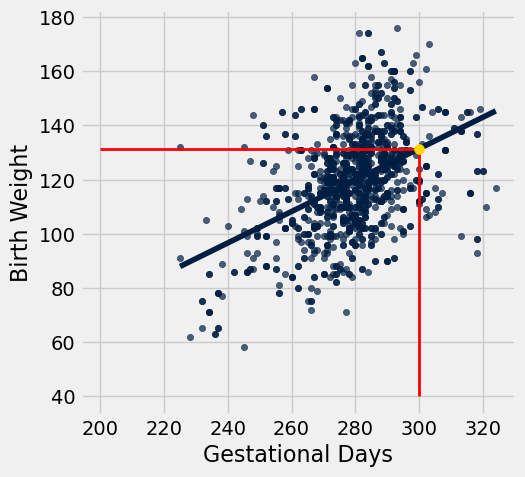

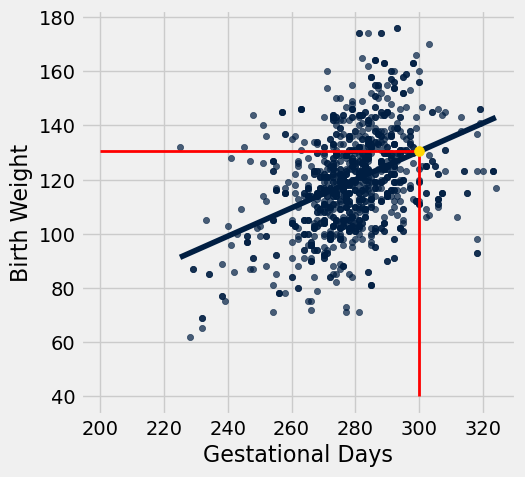

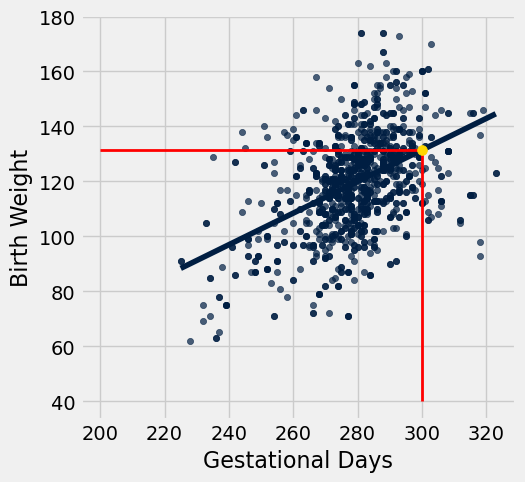

In [26]:
for i in np.arange(4): # (0,1,2,3)
    # i traverses through array (0,1,2,3)
    # i acts as merely a counter for this for loop
    
    # generate 4 more bootstrap samples
    resample = births.sample()
    # make a prediction for baby birth weight at x = 300 gestational days
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstrap sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='red', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);
print('Original sample prediction of baby birth weight (oz) at 300 gestational days:', prediction_at_300)

In [27]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

# 210 is a preemie (pre-term)
# 300 is a "normal" pregnancy duration, "normal" term
# 320 is post-term baby

(259, 294)

In [28]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])
lines

slope    | intercept | at 210  | at 300  | at 320
0.647306 | -60.9142  | 75.02   | 133.277 | 146.224
0.530287 | -28.9747  | 82.3855 | 130.111 | 140.717
0.554801 | -35.3051  | 81.203  | 131.135 | 142.231
0.594266 | -46.6865  | 78.1093 | 131.593 | 143.479
0.559885 | -36.8559  | 80.7199 | 131.11  | 142.307
0.637509 | -58.1989  | 75.6779 | 133.054 | 145.804
0.551671 | -34.3746  | 81.4763 | 131.127 | 142.16
0.637263 | -57.9574  | 75.8679 | 133.222 | 145.967
0.534771 | -29.6505  | 82.6514 | 130.781 | 141.476
0.539384 | -29.5595  | 83.7112 | 132.256 | 143.043

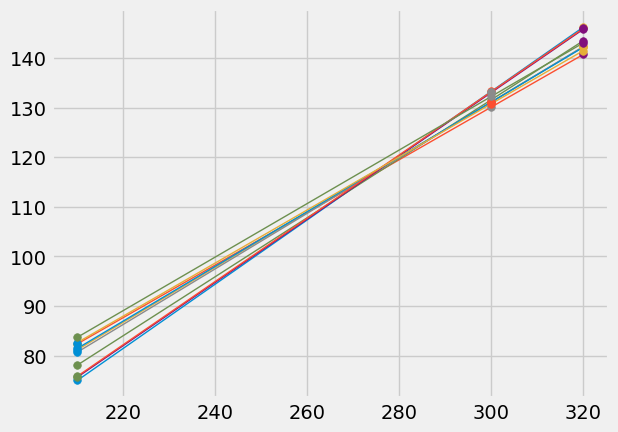

In [29]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(210, line.item('at 210'), s=30, zorder=3)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)
    plots.scatter(320, line.item('at 320'), s=30, zorder=3)

**Question:**
- Where do the lines meet? (in x and y)?
- Why do they meet where they meet?

In [30]:
np.mean(births.column('Gestational Days')), np.mean(births.column('Birth Weight'))

(279.11015490533561, 119.57401032702238)

In [31]:
lines = Table(['slope','intercept', 'at 279', 'at 249', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 279 + b, a * 249 + b, a * 309 + b])
lines

slope    | intercept | at 279  | at 249  | at 309
0.493345 | -18.86    | 118.783 | 103.983 | 133.584
0.475132 | -13.2252  | 119.337 | 105.083 | 133.59
0.485222 | -15.4419  | 119.935 | 105.378 | 134.492
0.545899 | -33.2761  | 119.03  | 102.653 | 135.407
0.49553  | -18.8315  | 119.421 | 104.556 | 134.287
0.538362 | -30.5692  | 119.634 | 103.483 | 135.785
0.569112 | -40.0137  | 118.768 | 101.695 | 135.842
0.559302 | -36.5249  | 119.52  | 102.741 | 136.299
0.523589 | -26.0947  | 119.987 | 104.279 | 135.694
0.533963 | -29.0191  | 119.957 | 103.938 | 135.975

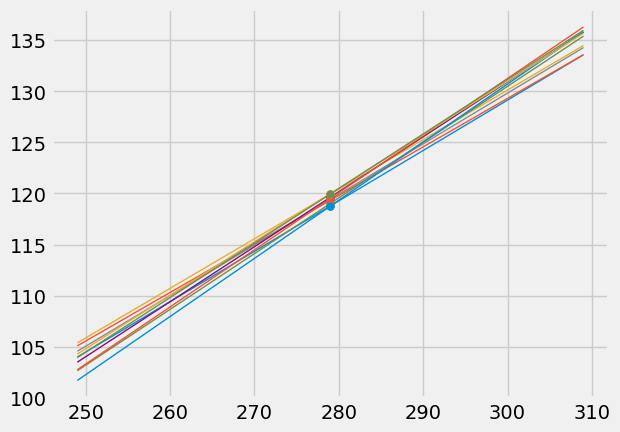

In [32]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    # changed plots.plot(x-axis, y-axis)
    plots.plot([249, 309], [line.item('at 249'), line.item('at 309')], lw=1)
    # changed plots.scatter(x-axis, y-axis)
    plots.scatter(279, line.item('at 279'), s=30, zorder=3)

## Prediction Interval

In [33]:
def bootstrap_prediction(t, x, y, new_x, repetitions=2_500):
    """ 
    Makes a 95% confidence interval for the height of the true line at new_x, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    round_left = round(left, 3)
    round_right = round(right, 3)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line at x =', new_x)
    print(round_left, 'to', round_right, '( width =', round(right - left, 3), ')') 

Approximate 95%-confidence interval for height of true line at x = 300
128.868 to 132.767 ( width = 3.899 )


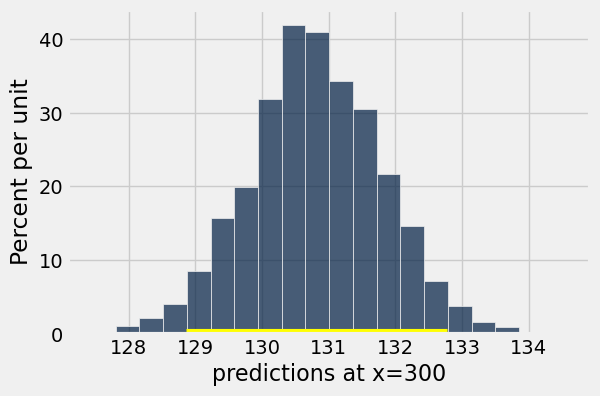

In [34]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)
# this histogram holds 2,500 bootstrap sample predictions
# each prediction was computed from a sample of size 1174

# below in yellow is our confidence interval, which grabs the middle 95% of our predictions

# challenge:
# how many individuals are in the 130.3-130.6 bin?
# we would need to calculate the area of the bin and multiply that percentage with the length of our predictions array
# ~39% per unit * 1/3 = __%
# multiply the percentage by number of things inside predictions array, which is 2500 
# this allows us to find # of individuals in a histogram bin


---

<center> Return to Slides </ceter>

---

## Predictions at Different Values of x

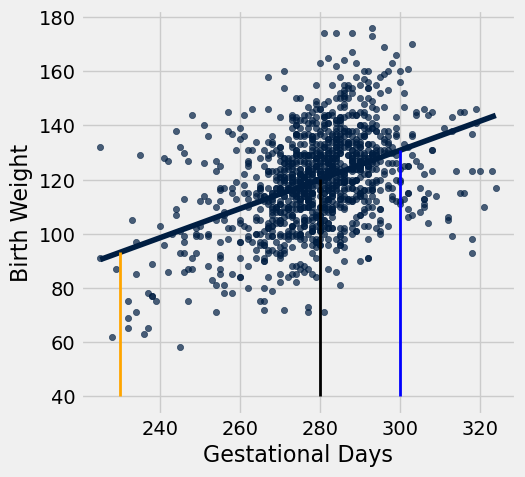

In [35]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='blue', lw=2);
prediction_at_230 = prediction_at(births, 'Gestational Days', 'Birth Weight', 230)
plots.plot([230, 230], [40, prediction_at_230], color='orange', lw=2);
prediction_at_280 = prediction_at(births, 'Gestational Days', 'Birth Weight', 280)
plots.plot([280, 280], [40, prediction_at_280], color='black', lw=2);

**Questions:**
- Which prediction has the largest confidence interval (yellow, black, blue)?
- Which one has the smallest?

Approximate 95%-confidence interval for height of true line at x = 230
89.105 to 97.277 ( width = 8.171 )


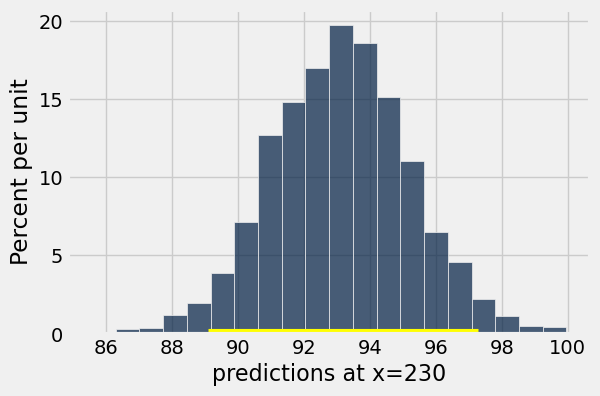

In [36]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 230)

Approximate 95%-confidence interval for height of true line at x = 280
119.138 to 121.021 ( width = 1.882 )


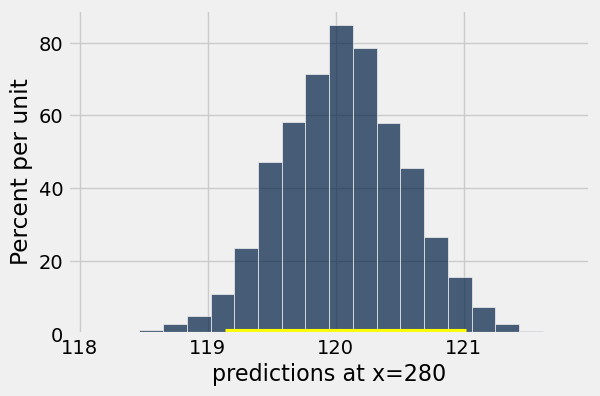

In [37]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

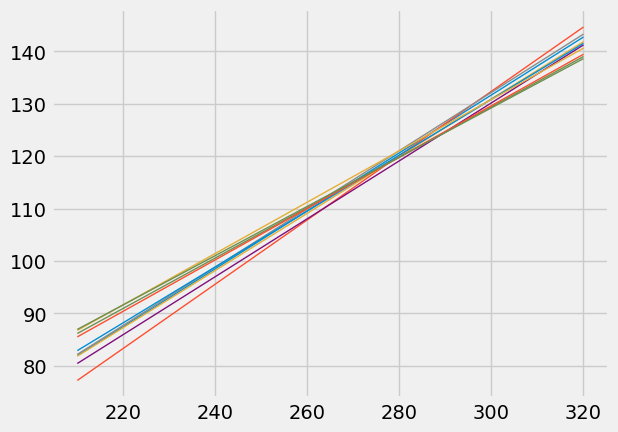

In [38]:
# No need to follow the code in this cell; just understand the graph

lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)

**Questions:**
- What would happen to those lines if we had more data?

---

<center> Return to Slides </ceter>

---

## Inference for the True Slope 
- Why do we care about the confidence in the slope?

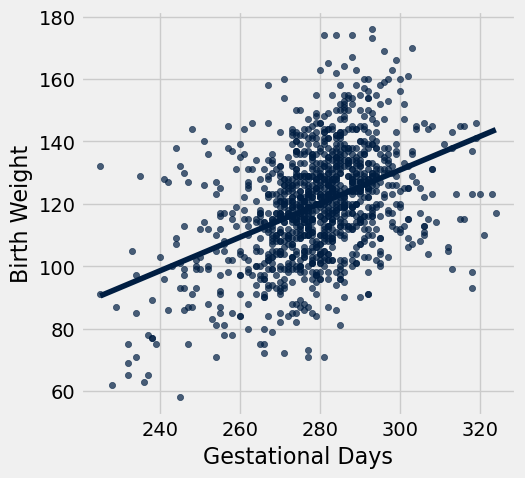

In [39]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [40]:
slope(births, 'Gestational Days', 'Birth Weight')

0.53784536766790358

**Question**
- What is the unit of this slope?

In [41]:
def bootstrap_slope(t, x, y, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the slope of the true line, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    round_left = round(left, 3)
    round_right = round(right, 3)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results (no need to follow this code)
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', round(observed_slope, 3))
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(round_left, 'to', round_right)

Slope of regression line: 0.538
Approximate 95%-confidence interval for the slope of the true line:
0.46 to 0.621


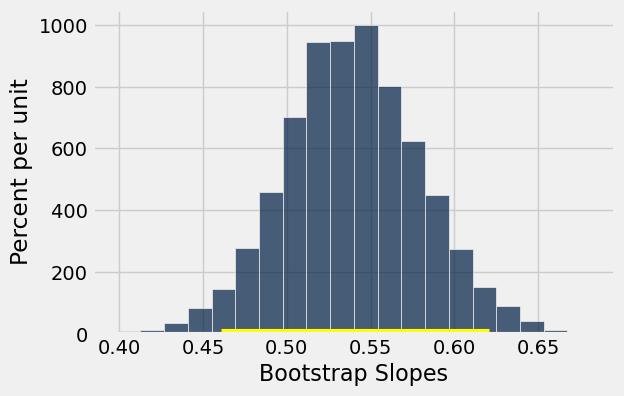

In [42]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight')

**Question**
- What does this confidence interval mean?
- Why is it relevant?
- What would we e.g. think if the confidence interval of the slope ranges from -0.3 to 0.6?

In [43]:
# try answering the above in your own notebook

# these are great SAMPLE exam questions :)

---

<center> Return to Slides </ceter>

---

## Rain on the Regression Parade

**Question**
- At a 5% p-value cutoff, can we state that there is a positive association?

In [44]:
# answer on your own here

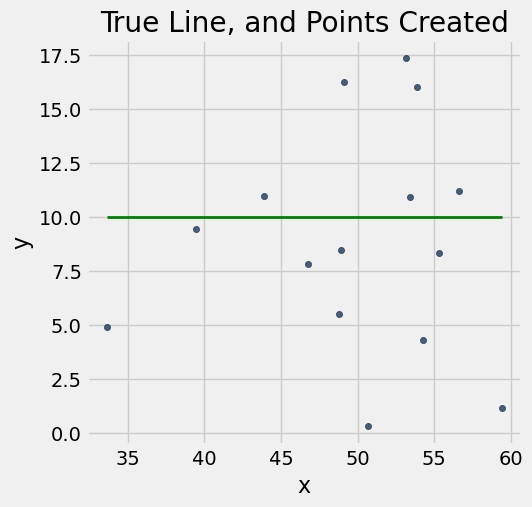

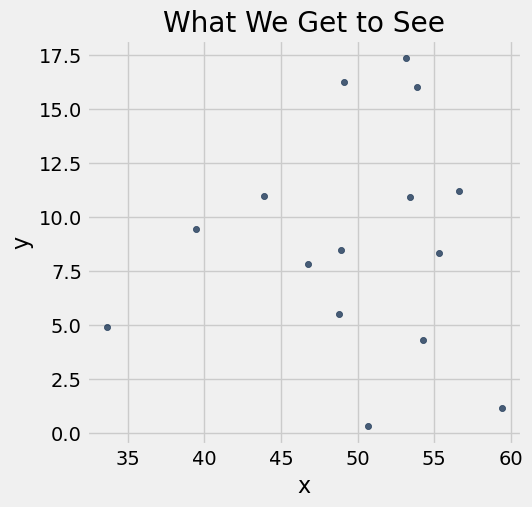

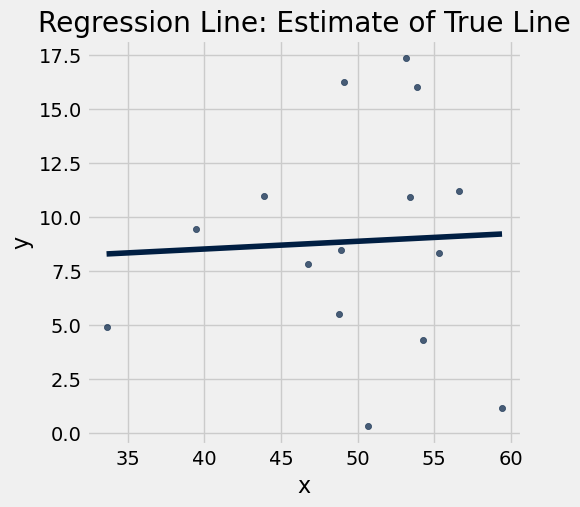

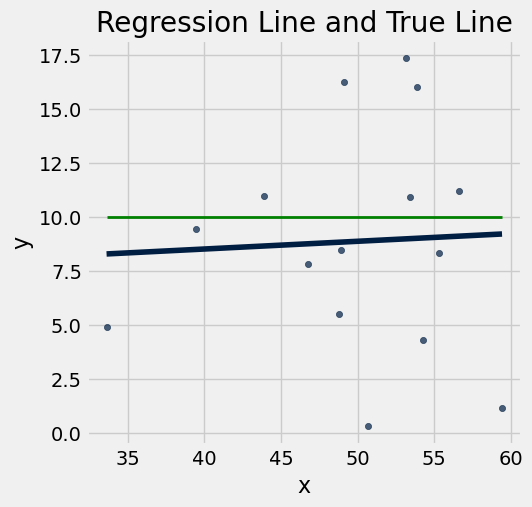

In [45]:
draw_and_compare(0, 10, 15)
# slope = 0, int = 10
# sample size = 15

# how does our model compare with the "true" line, with a larger sample size?

### Maternal Age and Birth Weight

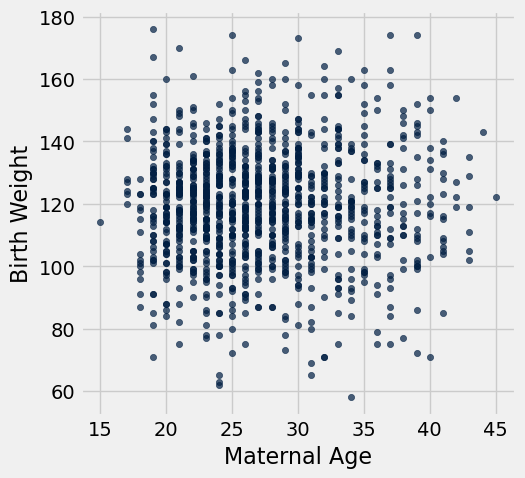

In [46]:
births.scatter('Maternal Age', 'Birth Weight')

In [47]:
slope(births, 'Maternal Age', 'Birth Weight')

0.095142237298344659

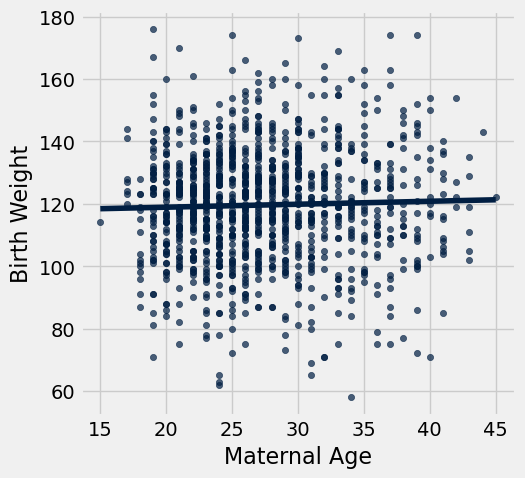

In [48]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

**Question**
- Is there a relationship?

### Hypothesis Test:

**Null:** Slope of true line is equal to 0.

**Alternative:** Slope of true line is not equal to 0.

In [54]:
births.show(5)
# give table snippet of births table

# show how we defined bootstrap_slope
# allow students to interpret what the function does
# 1. generates a number of bootstrap samples, collects median
# 2. genreates a histogram from all the bootstrap medians
# 3. captures middle 95% 
# 4. display confidence interavl (yellow)

# also provide null and alternative hypothesis
# null: slope is 0
# alternative: slope is not 0

Slope of regression line: 0.095
Approximate 95%-confidence interval for the slope of the true line:
-0.092 to 0.292


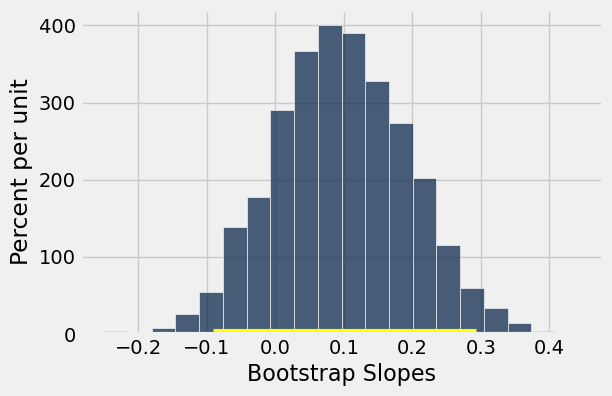

In [49]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight')

In [ ]:
# a) How many values does this histogram contain?
# what does each value represent?

# OR we can do fill in the blank: this histogram contains ___ values, each of which represents ___ 
# from a sample size of ___

# b) how can we use the above visualization to make a decision in our hypothesis testing?

# c) write a sentence or two to explain the results of our hypothesis testing in the context of the original
# data science question (who is the data set about?)


In [50]:
# in yellow, is our 95% confidence interval
# this captures the middle 95% of our bootstrap sample slopes
# this leads us to estimate our "TRUE" slope of a model, that compares the relationship between maternal age and birth weight
# is between -0.091 and 0.281

# positive value (0.281) the right endpoint of the confidence interval
# would mean there is a positive correlation between maternal age and birth weight,
# as one ages, the likelihood of your baby being chunkier is greater

# hm, does that make sense?

# bringing it back to hypothesis testing, this confidence interavl is really a tool to allow us to decide between our null and alternative
# next question, is the value we stated in our null contained in the interval?
# 0 is in the interval, we fail to reject the null hypothesis
# reinforces this notion, that there is no relationship between maternal age and baby's birth weight

In [51]:
# 